In [1]:
# ! python -m scripts.run-mace --experiment="stoianov_2022" --output_file="stoianov_2022"

In [2]:
import ehc_sn as ehc
import matplotlib.pyplot as plt
import numpy as np
import spnav

In [3]:
experiment = spnav.load_experiment("stoianov_2022")
experiment

Experiment:Stoianov2022 (n_blocks=5; grid_size=17 width=None height=None max_steps=100 see_through_walls=False agent_view_size=3 render_mode='human' screen_size=640 highlight=True agent_pov=False)

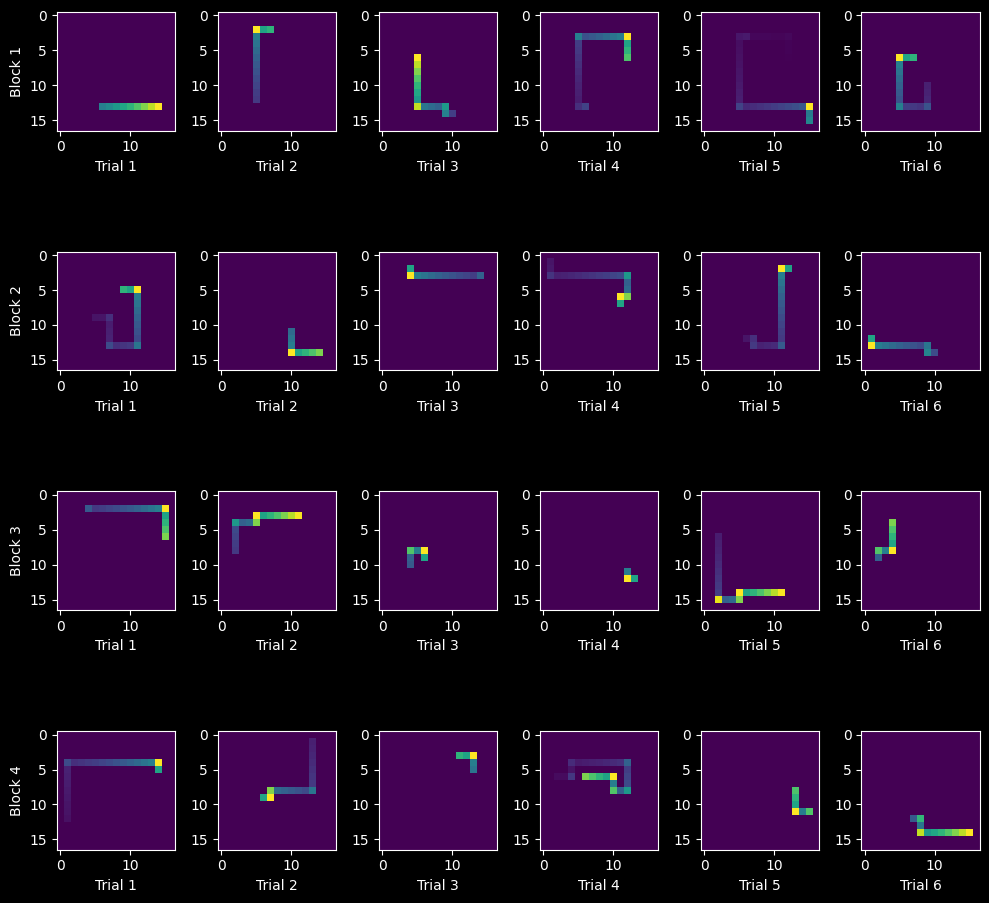

In [4]:
fig, axs = plt.subplots(4, 6, figsize=(10, 10))
for block, _ax, i in zip(experiment, axs, range(1, 10)):
    for trial, ax, j in zip(block, _ax, range(1, 10)):
        ax.imshow(ehc.sequence(trial, δ=0.9).T, cmap="viridis")
        ax.set_xlabel(f"Trial {j}")
    _ax[0].set_ylabel(f"Block {i}")
plt.tight_layout()
plt.show()

In [5]:
def pipeline(experiment):
    for block in experiment:
        yield [tr.reshape(-1, 17**2).astype(float) for tr in block]

In [6]:
model = ehc.baseline(
    experiment=list(pipeline(experiment)),
    α=[0.1] * 5,
    N=17**2,
    settings=ehc.GenSettings(τ=0.7, γ=0.9),
)

/home/borja/projects/spatial-navigation/ehc-sn/src/ehc_sn/equations.py:118: RuntimeWarning: divide by zero encountered in log
  δ = utils.kronecker_delta(ξ_index, np.log(x))
/home/borja/projects/spatial-navigation/ehc-sn/src/ehc_sn/equations.py:86: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  ξn = np.random.multivariate_normal(μ, Σ)  # Noisy observation
/home/borja/projects/spatial-navigation/ehc-sn/src/ehc_sn/equations.py:118: RuntimeWarning: invalid value encountered in log
  δ = utils.kronecker_delta(ξ_index, np.log(x))


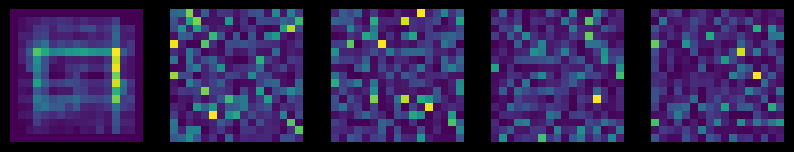

In [7]:
maps = model.sample_maps()
maps = np.array(maps).reshape(-1, 17, 17)

plt.figure(figsize=(10, 10))
for i, map in enumerate(maps):
    plt.subplot(5, 5, i + 1)
    plt.imshow(map)
    plt.axis("off")
plt.show()